In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install wordcloud
from wordcloud import WordCloud

In [24]:
df=pd.read_csv(r"spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [25]:
email_subjects=[]
email_text=[]
def split_subject(text):
    global email_subjects
    global email_text
    subject=""
    for ch in text:
        if(ch=='\r'):
            break
        subject+=ch
        
    email_subjects.append(subject)
    email_text.append(text.replace(subject,""))
    

In [26]:
df["text"]=df["text"].str.replace("Subject:","")
df.loc[df["label"]=="ham","label"]=0
df.loc[df["label"]=="spam","label"]=1
df["text"].apply(split_subject)
df["subject"]=email_subjects
df["text"]=email_text

In [27]:
df

,Unnamed: 0,label,text,label_num,subject
0,605,0,\r\nthis is a follow up to the note i gave you...,0,enron methanol ; meter # : 988291
1,2349,0,\r\n( see attached file : hplnol 09 . xls )\r\...,0,"hpl nom for january 9 , 2001"
2,3624,0,"\r\nho ho ho , we ' re around to that most won...",0,neon retreat
3,4685,1,\r\nabasements darer prudently fortuitous unde...,1,"photoshop , windows , office . cheap . main t..."
4,2030,0,\r\nthis deal is to book the teco pvr revenue ...,0,re : indian springs
...,...,...,...,...,...
5166,1518,0,\r\nthe transport volumes decreased from 25000...,0,put the 10 on the ft
5167,404,0,\r\nhpl can ' t take the extra 15 mmcf / d ove...,0,3 / 4 / 2000 and following noms
5168,2933,0,"\r\n>\r\n>\r\njulie , as i mention earlier we ...",0,calpine daily gas nomination
5169,1409,0,\r\nattached are the worksheets for august 200...,0,industrial worksheets for august 2000 activity


In [28]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df
df=df.drop(df.columns[0], axis=1)
df=df.drop('label_num', axis=1)
df=swap_columns(df, 'label', 'subject')
df

,subject,text,label
0,enron methanol ; meter # : 988291,\r\nthis is a follow up to the note i gave you...,0
1,"hpl nom for january 9 , 2001",\r\n( see attached file : hplnol 09 . xls )\r\...,0
2,neon retreat,"\r\nho ho ho , we ' re around to that most won...",0
3,"photoshop , windows , office . cheap . main t...",\r\nabasements darer prudently fortuitous unde...,1
4,re : indian springs,\r\nthis deal is to book the teco pvr revenue ...,0
...,...,...,...
5166,put the 10 on the ft,\r\nthe transport volumes decreased from 25000...,0
5167,3 / 4 / 2000 and following noms,\r\nhpl can ' t take the extra 15 mmcf / d ove...,0
5168,calpine daily gas nomination,"\r\n>\r\n>\r\njulie , as i mention earlier we ...",0
5169,industrial worksheets for august 2000 activity,\r\nattached are the worksheets for august 200...,0


In [29]:
import string
import re
def clean_text(s): 
    for cs in s:
        if  not cs in string.ascii_letters:
            s = s.replace(cs, ' ')
    return s.rstrip('\r\n')
def remove_little(s): 
    wordsList = s.split()
    k_length=2
    resultList = [element for element in wordsList if len(element) > k_length]
    resultString = ' '.join(resultList)
    return resultString


df['text'] = df['text'].apply(lambda x: clean_text(x))
df['text'] = df['text'].apply(lambda x: remove_little(x))
df['subject'] = df['subject'].apply(lambda x: clean_text(x))
df['subject'] = df['subject'].apply(lambda x: remove_little(x))
df

,subject,text,label
0,enron methanol meter,this follow the note gave you monday prelimina...,0
1,hpl nom for january,see attached file hplnol xls hplnol xls,0
2,neon retreat,around that most wonderful time the year neon ...,0
3,photoshop windows office cheap main trending,abasements darer prudently fortuitous undergon...,1
4,indian springs,this deal book the teco pvr revenue understand...,0
...,...,...,...
5166,put the the,the transport volumes decreased from all shoul...,0
5167,and following noms,hpl can take the extra mmcf over the weekend t...,0
5168,calpine daily gas nomination,julie mention earlier hope start the unit this...,0
5169,industrial worksheets for august activity,attached are the worksheets for august activit...,0


In [30]:
from wordcloud import STOPWORDS 
more_stopwords = {'re' , 's' , 'subject','hpl','hou','enron'}
STOPWORDS = STOPWORDS.union(more_stopwords)

In [31]:
dic_all={}
def count_words(s):
    global dic_all
    wordsList = s.split()
    for w in wordsList:
        if not w in dic_all:
             dic_all[w]=1
        else:
             dic_all[w]+=1
        
                

In [32]:
dic_all={}
df['subject'].apply(lambda x: count_words(x))
dic_all=sorted(dic_all.items(), key=lambda x:x[1],reverse=True)
df_new=pd.DataFrame(dic_all)
df_new.head(20)

,0,1
0,for,1023
1,hpl,582
2,nom,338
3,meter,333
4,enron,276
5,and,263
6,gas,232
7,the,214
8,actuals,214
9,nomination,209


In [33]:
dic_all={}
df[df['label']==1]['subject'].apply(lambda x: count_words(x))
dic_all=sorted(dic_all.items(), key=lambda x:x[1],reverse=True)
df_one=pd.DataFrame(dic_all)
df_one

,0,1
0,you,145
1,the,128
2,your,128
3,for,120
4,and,95
...,...,...
2871,qns,1
2872,transferring,1
2873,oxyyyyconttin,1
2874,anomaly,1


In [34]:
dic_all={}
df[df['label']==0]['subject'].apply(lambda x: count_words(x))
dic_all=sorted(dic_all.items(), key=lambda x:x[1],reverse=True)
df_zero=pd.DataFrame(dic_all)
df_zero

,0,1
0,for,903
1,hpl,582
2,nom,338
3,meter,333
4,enron,276
...,...,...
1994,seasonal,1
1995,mergers,1
1996,chair,1
1997,liquide,1


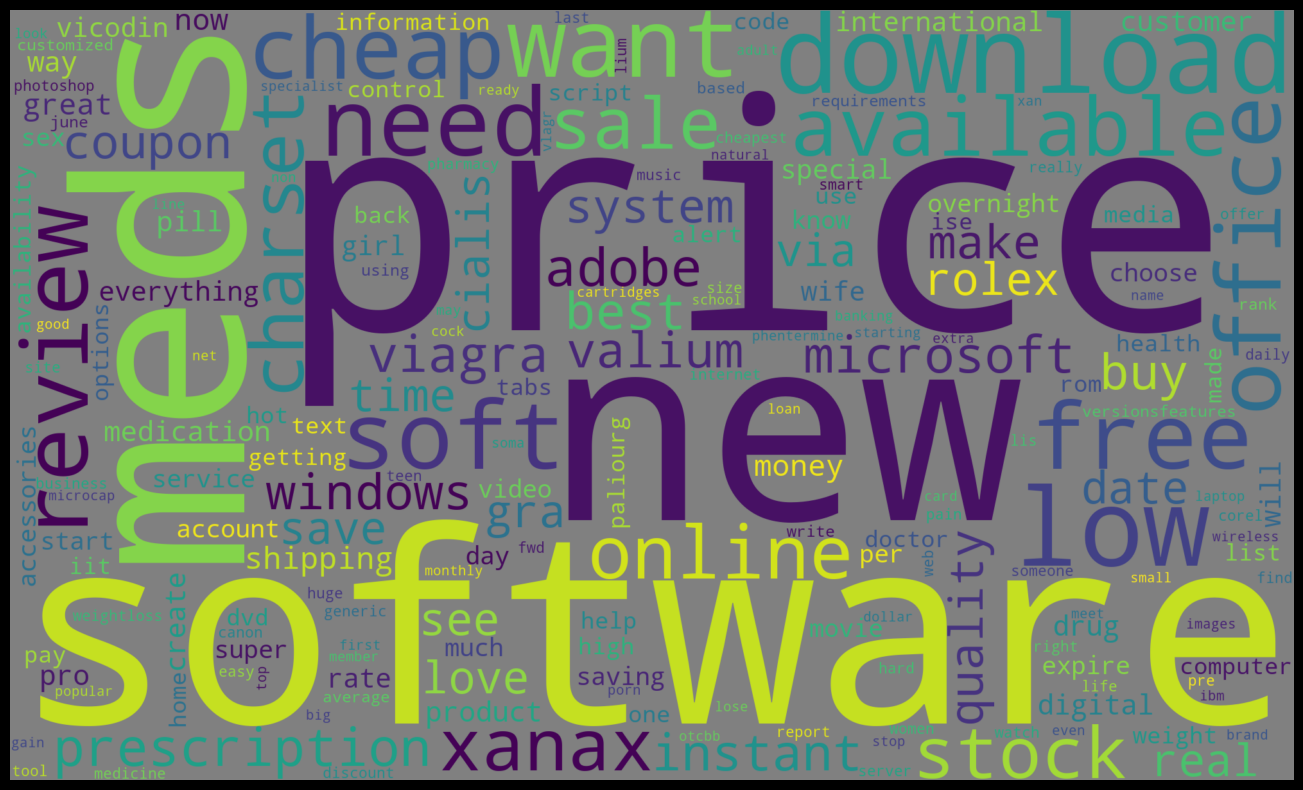

In [35]:
word_cloud = WordCloud(collocations = False, background_color = 'gray',stopwords=STOPWORDS
                       ,width=2000, height=1200).generate("".join(df[df['label']==1]["subject"]))
# Display the generated Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

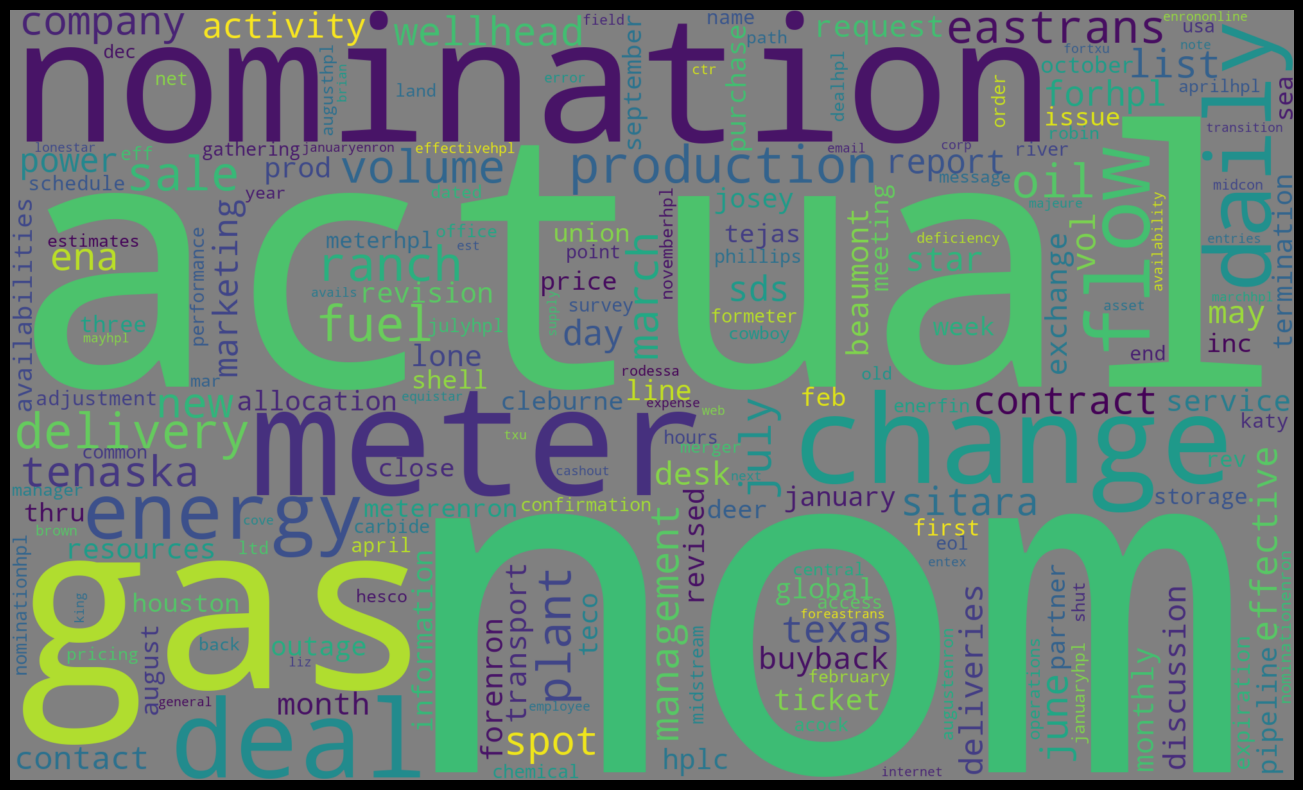

In [36]:
word_cloud = WordCloud(collocations = False, background_color = 'gray',stopwords=STOPWORDS
                       ,width=2000, height=1200).generate("".join(df[df['label']==0]["subject"]))
# Display the generated Word Cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
df

,subject,text,label
0,enron methanol meter,this follow the note gave you monday prelimina...,0
1,hpl nom for january,see attached file hplnol xls hplnol xls,0
2,neon retreat,around that most wonderful time the year neon ...,0
3,photoshop windows office cheap main trending,abasements darer prudently fortuitous undergon...,1
4,indian springs,this deal book the teco pvr revenue understand...,0
...,...,...,...
5166,put the the,the transport volumes decreased from all shoul...,0
5167,and following noms,hpl can take the extra mmcf over the weekend t...,0
5168,calpine daily gas nomination,julie mention earlier hope start the unit this...,0
5169,industrial worksheets for august activity,attached are the worksheets for august activit...,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
#split email dataset 
df['label']=df['label'].astype(str).astype(int)
X_train, X_test , y_train, y_test = train_test_split(df['text'], df['label'] , test_size=0.3)
#vectorize our training dataset 
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)
#fit the dataset on multinomial naive bayes 
Spam_detection = MultinomialNB()
targets = y_train.values
Spam_detection.fit(count, targets)


MultinomialNB()
#make predictions 
y_predict = Spam_detection.predict(Vectorizer.transform(X_test))
#test accuracy 
accuracy_score(y_test, y_predict)

0.9645618556701031

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1097
           1       0.98      0.90      0.94       455

    accuracy                           0.96      1552
   macro avg       0.97      0.95      0.96      1552
weighted avg       0.96      0.96      0.96      1552



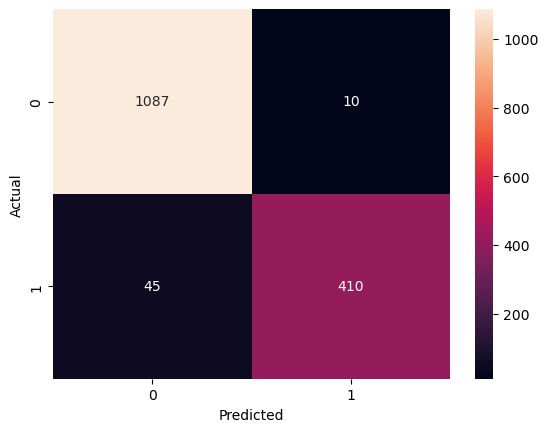

In [39]:
import seaborn as sns
#create a confusion matrix 
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#print the classification report 
print(classification_report(y_test , y_predict))

In [42]:
#Test our model for emails not in dataset (spam mail)
Email = ['Are you an experienced Python developer seeking a high-high-paying role with the flexibility to work remotely? Your dream remote role awaits you! Take a step towards it with Python Jump Start on Wednesday November 23rd at 8am PT 📅. With this 3-hour virtual event, you get thoroughly vetted for quality opportunities and stand a chance to make it to client interviews. Come prepared to pass the Python tests during the event as a high score will qualify you for the client interviews!']
y_predict = Spam_detection.predict(Vectorizer.transform(Email))
print(y_predict)

#Test our model for emails not in dataset (non spam mail)
temp = ["All Students are hereby informed that the 2nd Course/ Faculty Feedback of Fall-2022 semester has been enabled on Flex portal. You are advised to submit independent, fair, and transparent feedback of your concerned courses/teachers. "]
y_predict = Spam_detection.predict(Vectorizer.transform(temp))
print(y_predict)

[1]
[0]
